# CSE437: Data Science - Coding with Real World Data

* Dataset: https://www.kaggle.com/datasets/meirnizri/covid19-dataset
* Colab: https://colab.research.google.com/drive/1idoT1djGGHrrR9P8aZoXhYLN7llE2Qgt?usp=sharing

**NOTE -** Restart the runtime and run all after running the following cell for the first time.

In [ ]:
!pip install matplotlib --upgrade

## Import Libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Data Visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Model Evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay

## Data Exploration

In [ ]:
PATH = "/content/drive/MyDrive/project/covid-dataset.csv" # Siam

In [ ]:
# COVID-19 Dataset

df = pd.read_csv(PATH)

print(f"ROWS: {round(df.shape[0] / 1000000, 2)} M \nCOLUMNS: {df.shape[1]}")

ROWS: 1.05 M 
COLUMNS: 21


In [ ]:
df.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97


In [ ]:
df.tail()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
1048570,2,13,2,1,9999-99-99,97,2,40,97,2,...,2,2,2,2,2,2,2,2,7,97
1048571,1,13,2,2,9999-99-99,2,2,51,97,2,...,2,2,1,2,2,2,2,2,7,2
1048572,2,13,2,1,9999-99-99,97,2,55,97,2,...,2,2,2,2,2,2,2,2,7,97
1048573,2,13,2,1,9999-99-99,97,2,28,97,2,...,2,2,2,2,2,2,2,2,7,97
1048574,2,13,2,1,9999-99-99,97,2,52,97,2,...,2,2,2,2,2,2,2,2,7,97


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   USMER                 1048575 non-null  int64 
 1   MEDICAL_UNIT          1048575 non-null  int64 
 2   SEX                   1048575 non-null  int64 
 3   PATIENT_TYPE          1048575 non-null  int64 
 4   DATE_DIED             1048575 non-null  object
 5   INTUBED               1048575 non-null  int64 
 6   PNEUMONIA             1048575 non-null  int64 
 7   AGE                   1048575 non-null  int64 
 8   PREGNANT              1048575 non-null  int64 
 9   DIABETES              1048575 non-null  int64 
 10  COPD                  1048575 non-null  int64 
 11  ASTHMA                1048575 non-null  int64 
 12  INMSUPR               1048575 non-null  int64 
 13  HIPERTENSION          1048575 non-null  int64 
 14  OTHER_DISEASE         1048575 non-null  int64 
 15

In [ ]:
# Null values in columns

df.isnull().sum()

USMER                   0
MEDICAL_UNIT            0
SEX                     0
PATIENT_TYPE            0
DATE_DIED               0
INTUBED                 0
PNEUMONIA               0
AGE                     0
PREGNANT                0
DIABETES                0
COPD                    0
ASTHMA                  0
INMSUPR                 0
HIPERTENSION            0
OTHER_DISEASE           0
CARDIOVASCULAR          0
OBESITY                 0
RENAL_CHRONIC           0
TOBACCO                 0
CLASIFFICATION_FINAL    0
ICU                     0
dtype: int64

We can see that there is no null value in this dataset. But there must be some ambiguous data since it is a dataset of 1 million rows. So we have to look deeper.

In [ ]:
# Unique values in columns

for i in df.columns:
    print(i, "=>", len(df[i].unique()))

USMER => 2
MEDICAL_UNIT => 13
SEX => 2
PATIENT_TYPE => 2
DATE_DIED => 401
INTUBED => 4
PNEUMONIA => 3
AGE => 121
PREGNANT => 4
DIABETES => 3
COPD => 3
ASTHMA => 3
INMSUPR => 3
HIPERTENSION => 3
OTHER_DISEASE => 3
CARDIOVASCULAR => 3
OBESITY => 3
RENAL_CHRONIC => 3
TOBACCO => 3
CLASIFFICATION_FINAL => 7
ICU => 4


## Ambiguous Data
We try to explore the data and look if there is any data that does not make any sense. We visualize them and mark them for preprocessing.

In [ ]:
# Death count based on dates

df.DATE_DIED.value_counts()

9999-99-99    971633
06/07/2020      1000
07/07/2020       996
13/07/2020       990
16/06/2020       979
               ...  
24/11/2020         1
17/12/2020         1
08/12/2020         1
16/03/2021         1
22/04/2021         1
Name: DATE_DIED, Length: 401, dtype: int64

Here, the date `9999-99-99` does not make any sense. So we consider those corresponding patients not dead.

In [ ]:
# Patients connected to ventilation

df.INTUBED.value_counts()

97    848544
2     159050
1      33656
99      7325
Name: INTUBED, dtype: int64

In [ ]:
# Patients in ICU

df.ICU.value_counts()

97    848544
2     175685
1      16858
99      7488
Name: ICU, dtype: int64

Here, we can see that there is a lot of ambiguous data in `ICU` & `INTUBED` column.

In [ ]:
# Patients with diabetes

df.DIABETES.value_counts()

2     920248
1     124989
98      3338
Name: DIABETES, dtype: int64

Here, we know that a person can either have Diabetes (`1`) or not have Diabetes (`0`).

Meaning, there is supposed to be only 2 values for `DIABETES`. Therefore, `98` represents NaN value here.

Same goes for `PNEUMONIA`, `COPD`, `ASTHMA`, etc.

In [ ]:
# Patients with pregnancy

df.PREGNANT.value_counts()

97    523511
2     513179
1       8131
98      3754
Name: PREGNANT, dtype: int64

In [ ]:
pd.crosstab(df.SEX, df.PREGNANT)

PREGNANT,1,2,97,98
SEX,,,,
1,8131,513179,0,3754
2,0,0,523511,0


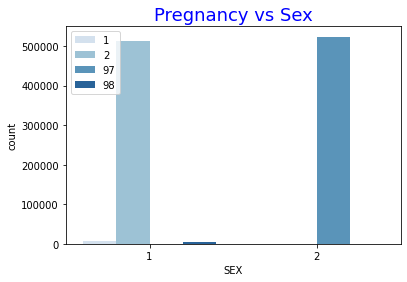

In [ ]:
sns.countplot(x=df.SEX,
              hue=df.PREGNANT,
              palette="Blues")

plt.legend(loc='best')
plt.title("Pregnancy vs Sex",fontsize=18, color="blue");

Here, `97` of `PREGNANT` represents male patients that are pregnant. We know that, this is impossible.

## Data Preprocessing

Now we get rid of missing values and deal with ambiguous data. We can either delete the entire rows or manipulate them according to the context.

In [ ]:
# Dealing with columns other than PREGNANT, DATE_DIED, ICU, INTUBED

df = df[(df.PNEUMONIA == 1) | (df.PNEUMONIA == 2)]
df = df[(df.DIABETES == 1) | (df.DIABETES == 2)]
df = df[(df.COPD == 1) | (df.COPD == 2)]
df = df[(df.ASTHMA == 1) | (df.ASTHMA == 2)]
df = df[(df.INMSUPR == 1) | (df.INMSUPR == 2)]
df = df[(df.HIPERTENSION == 1) | (df.HIPERTENSION == 2)]
df = df[(df.OTHER_DISEASE == 1) | (df.OTHER_DISEASE == 2)]
df = df[(df.CARDIOVASCULAR == 1) | (df.CARDIOVASCULAR == 2)]
df = df[(df.OBESITY == 1) | (df.OBESITY == 2)]
df = df[(df.RENAL_CHRONIC == 1) | (df.RENAL_CHRONIC == 2)]
df = df[(df.TOBACCO == 1) | (df.TOBACCO == 2)]

Here, we only kept the rows with values `1` and `2`. We dropped all others.

In [ ]:
# Dealing with PREGNANT column

df.PREGNANT = df.PREGNANT.replace(97, 2)
df = df[(df.PREGNANT == 1) | (df.PREGNANT == 2)]

Here, we replaced value `97` (male pregnant patients) with the value `2` (real pregnant). And we dropped others.

In [ ]:
# Dealing with DATE_DIED column

df["DEATH"] = [2 if date == '9999-99-99' else 1 for date in df.DATE_DIED]
df.drop(columns=["DATE_DIED"], inplace=True)

Here, we created a new column named `DEAD` that represents whether a patient is alive.

Therefore, we don't need `DATE_DIED` column, so we drop it.

In [ ]:
# Dealing with ICU column & INTUBED column

df.drop(columns=["ICU", "INTUBED"], inplace=True)

`ICU` and `INTUBED` columns have too many ambiguous data to deal with that can be simply ignored.

## Data Visualization
Now that we are done dealing with missing and ambiguous data, we try to visualize the dataset and its different columns for easier exploration and better model construction.

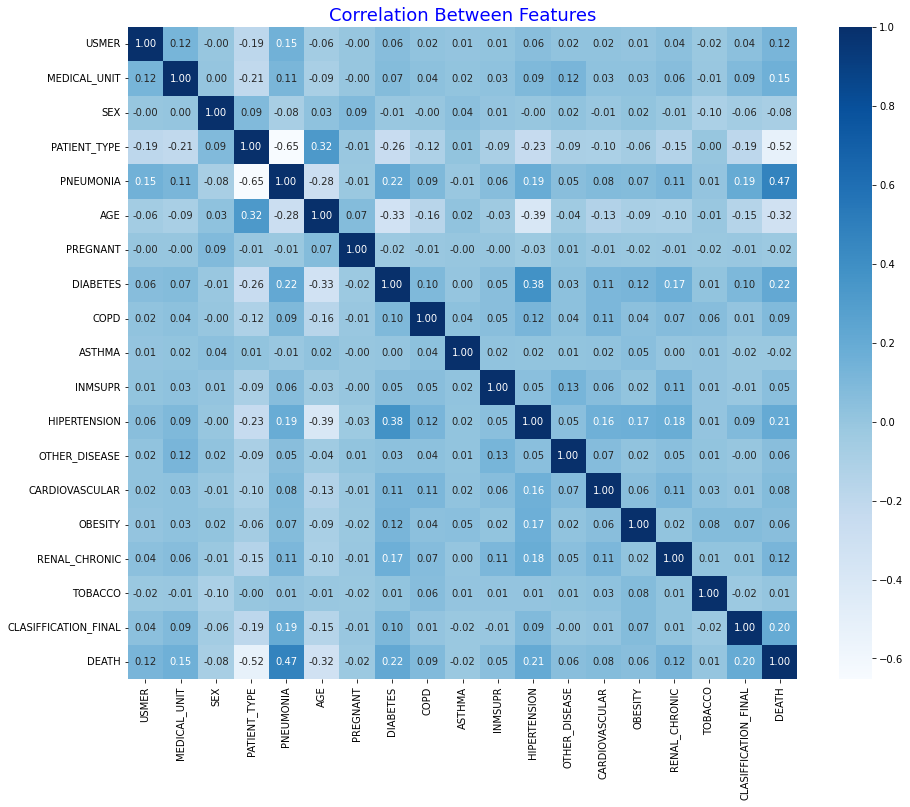

In [ ]:
# Correlation Matrix

plt.figure(figsize=(15,12))
sns.heatmap(df.corr(),
            annot=True,
            cmap="Blues",
            fmt=".2f")

plt.title("Correlation Between Features",
          fontsize=18,
          color="blue");

From this correlation matrix, we can see which features are more related to each other. The darker the color is, the more related they are.

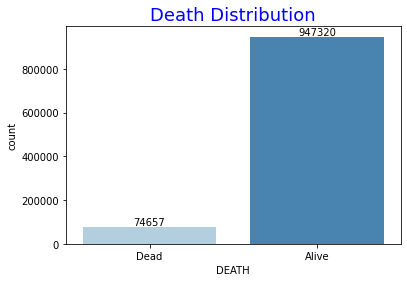

In [ ]:
# Patients that are dead

ax = sns.countplot(x=df.DEATH,
                   palette="Blues")

plt.title("Death Distribution", fontsize=18, color="blue")
plt.bar_label(ax.containers[0])
plt.xticks([0, 1], ["Dead", "Alive"]);

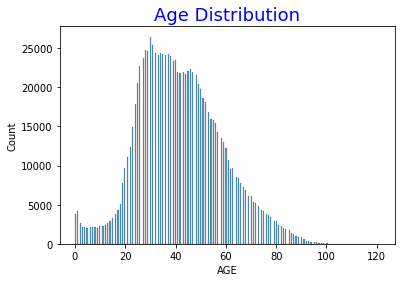

In [ ]:
# Patients according to their ages

sns.histplot(x=df.AGE)
plt.title("Age Distribution",
          color="blue",
          fontsize=18);

We can see that, most patients are between 20 to 60 years old

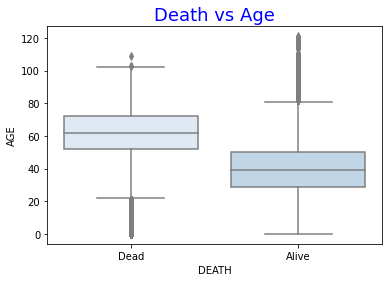

In [ ]:
# Relation between age & death

sns.boxplot(x="DEATH",
            y="AGE",
            data=df,
            palette=sns.color_palette("Blues"))

plt.title("Death vs Age", fontsize=18, color="blue")
plt.xticks([0, 1], ["Dead", "Alive"]);

We can see that, patients of `AGE` 30 to 70 are more likely to die than younger patients

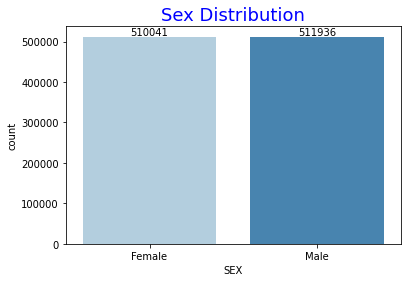

In [ ]:
# Patients according to their sex

ax = sns.countplot(x=df.SEX,
                   palette="Blues")

plt.title("Sex Distribution", fontsize=18, color="blue")
plt.bar_label(ax.containers[0])
plt.xticks([0, 1], ["Female", "Male"]);

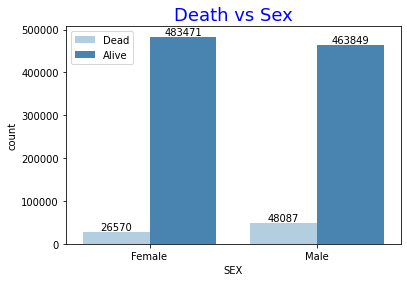

In [ ]:
# Death according to sex

ax = sns.countplot(x=df.SEX,
                   hue=df.DEATH,
                   palette="Blues")

plt.title("Death vs Sex", fontsize=18, color="blue")
plt.bar_label(ax.containers[0])
plt.bar_label(ax.containers[1])

plt.legend(["Dead", "Alive"], loc="best")
plt.xticks([0, 1], ["Female", "Male"]);

We can see that, male patients are more likely to die than female patients

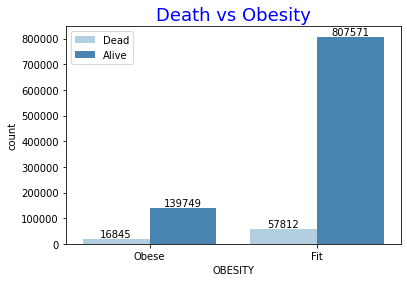

In [ ]:
# Relation between death & obesity

ax = sns.countplot(x=df.OBESITY,
                   hue=df.DEATH,
                   palette="Blues")

plt.title("Death vs Obesity", fontsize=18, color="blue")
plt.bar_label(ax.containers[0])
plt.bar_label(ax.containers[1])

plt.legend(["Dead", "Alive"], loc="best")
plt.xticks([0, 1], ["Obese", "Fit"]);

We can see that, obese patients are more likely to die than fit patients

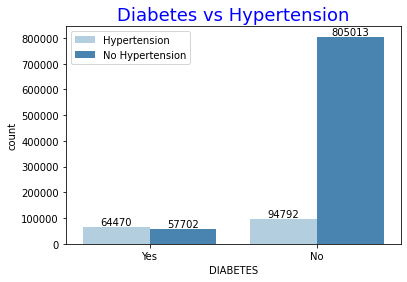

In [ ]:
# Relation between diabetes & hypertension

ax = sns.countplot(x=df.DIABETES,
                   hue=df.HIPERTENSION,
                   palette="Blues")

plt.title("Diabetes vs Hypertension", fontsize=18, color="blue")
plt.bar_label(ax.containers[0])
plt.bar_label(ax.containers[1])

plt.legend(["Hypertension", "No Hypertension"], loc="best")
plt.xticks([0, 1], ["Yes", "No"]);

We can see that, those who has Diabetes is likely to have Hypertension too

###Model Training


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC

from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split

In [ ]:
#independent variable
X = df.drop(columns="DEATH", axis=1)
#dependent variable
y = df["DEATH"]

In [ ]:
# Split the data into train & test sets
np.random.seed(1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
models = {"LR": LogisticRegression(max_iter=1000),
          "KNN": KNeighborsClassifier(n_neighbors=6),
          "RF": RandomForestClassifier(),
          "DT": DecisionTreeClassifier(max_depth=1),
          "SVM": LinearSVC()}

def fit_and_score(models, X_train, X_test, y_train, y_test):
    np.random.seed(1)
    model_scores = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        model_scores[name] = model.score(X_test, y_test)

    return model_scores

In [ ]:
model_scores = fit_and_score(models = models,
                             X_train = X_train,
                             X_test = X_test,
                             y_train = y_train,
                             y_test = y_test)
model_scores

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


{'LR': 0.9378363568758684,
 'KNN': 0.9321170668701931,
 'RF': 0.9342208262392611,
 'DT': 0.9264662713556038,
 'SVM': 0.9356787804066615}

**Model Scores -**

* Logistic Regression: 0.9378363568758684
* K-Nearest Neighbors: 0.9321170668701931
* Random Forest: 0.9342208262392611
* Decision Tree: 0.9264662713556038
* Support Vector Machine: 0.9356787804066615

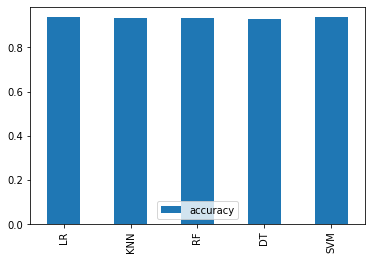

In [ ]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar();

### AdaBoost

In [ ]:
adb_clf = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1), n_estimators=100)
adb_clf.fit(X_train, y_train)
y_pred_proba = adb_clf.predict_proba(X_test)[:,1]
adb_clf_roc_auc_score = roc_auc_score(y_test, y_pred_proba)

### ROC Curve

In [ ]:
print('ROC AUC score: {:.2f}'.format(adb_clf_roc_auc_score))

ROC AUC score: 0.96


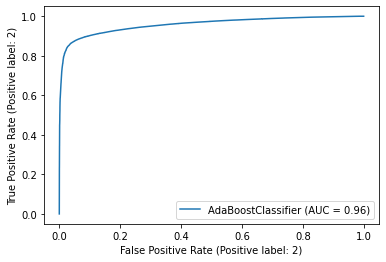

In [ ]:
RocCurveDisplay.from_estimator(adb_clf, X_test, y_test);



```
# This is formatted as code
```

### Confusion Matrix

Text(6.0, 0.5, 'Prediction')

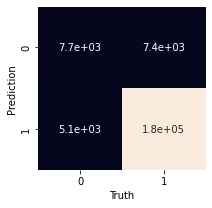

In [ ]:
import seaborn as sns

y_preds = adb_clf.predict(X_test)

fig, ax = plt.subplots(figsize=(3, 3))
ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                annot=True,
                cbar=False)
plt.xlabel("Truth")
plt.ylabel("Prediction")

In [ ]:
clf = adb_clf

### Cross Validation
`Accuracy` tells us how many times the ML model was correct overall. `Precision` is how good the model is at predicting a specific category. `Recall` tells us how many times the model was able to detect a specific category. `F1 Score` is the harmonic mean between precision and recall.

In [ ]:
# Cross-validated Accuracy

cv_accuracy = cross_val_score(clf, X, y,
                        cv=5,
                        scoring="accuracy")
cv_accuracy = np.mean(cv_accuracy)
cv_accuracy

0.8763368828963163

In [ ]:
# Cross-validated Precision

cv_precision = cross_val_score(clf, X, y,
                        cv=5,
                        scoring="precision")
cv_precision = np.mean(cv_precision)
cv_precision

0.5252307598397844

In [ ]:
# Cross-validated Recall

cv_recall = cross_val_score(clf, X, y,
                        cv=5,
                        scoring="recall")
cv_recall = np.mean(cv_recall)
cv_recall

0.430026401651185

In [ ]:
# Cross-validated F1

cv_f1 = cross_val_score(clf, X, y,
                        cv=5,
                        scoring="f1")
cv_f1 = np.mean(cv_f1)
cv_f1

0.3176187711181153

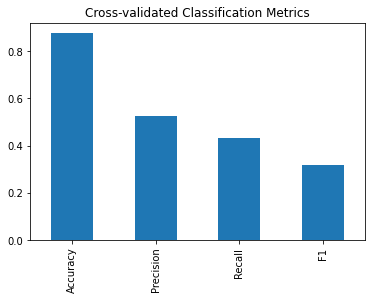

In [ ]:
cv_metrics = pd.DataFrame({"Accuracy": cv_accuracy,
                           "Precision": cv_precision,
                           "Recall": cv_recall,
                           "F1": cv_f1},
                           index=[0])

cv_metrics.T.plot.bar(title="Cross-validated Classification Metrics",
                      legend=False);